In [1]:
import pandas as pd
import requests
import tweepy
import os
import json
import numpy as np
from matplotlib import pyplot as plt
import re

%matplotlib inline

# 一、数据清洗

## Gather

In [2]:
folder_name = 'raw_data'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [3]:
twitter_archive_enhanced = pd.read_csv('raw_data/twitter-archive-enhanced.csv')

In [4]:
file_name = 'image_predictions.tsv'

In [5]:
url = 'https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/image-predictions.tsv'

response = requests.get(url)

with open(os.path.join(folder_name, file_name), 'wb') as f:
    f.write(response.content)

In [6]:
image_predictions = pd.read_csv(os.path.join(folder_name, file_name), sep='\t' )

In [7]:
df_list = []

with open('raw_data/tweet_json.txt', encoding='utf-8') as file:     
    while True:
        content = file.readline()
        if not content:
            break
        new_dict = json.loads(content)
    
        tweet_id = new_dict['id_str']
        retweet_count = new_dict['retweet_count'] 
        favorite_count = new_dict['favorite_count']
        df_list.append({ 'tweet_id': tweet_id,
                         'retweet_count': retweet_count,
                        'favorite_count': favorite_count
        })
    
tweet_json = pd.DataFrame(df_list, columns=['tweet_id', 'retweet_count', 'favorite_count' ])

## Assessment

### 表格 *twitter_archive_enhanced* 

#### 可视化评估：

In [8]:
twitter_archive_enhanced

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


#### 编程评估：

In [9]:
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [10]:
twitter_archive_enhanced.retweeted_status_id.value_counts()

7.757333e+17    1
7.507196e+17    1
6.742918e+17    1
6.833919e+17    1
8.269587e+17    1
8.780576e+17    1
7.320056e+17    1
7.186315e+17    1
6.732953e+17    1
7.914070e+17    1
8.447048e+17    1
7.862340e+17    1
8.685523e+17    1
7.504293e+17    1
8.327664e+17    1
6.690004e+17    1
6.873173e+17    1
7.638376e+17    1
7.815247e+17    1
8.092201e+17    1
8.000650e+17    1
8.174239e+17    1
8.001414e+17    1
7.909461e+17    1
7.867091e+17    1
8.406323e+17    1
8.688804e+17    1
7.869631e+17    1
7.733088e+17    1
8.222448e+17    1
               ..
6.816941e+17    1
7.899865e+17    1
7.939622e+17    1
6.800555e+17    1
7.128090e+17    1
8.164506e+17    1
6.769365e+17    1
6.675487e+17    1
8.083449e+17    1
7.626999e+17    1
6.678667e+17    1
8.479710e+17    1
6.820881e+17    1
8.352641e+17    1
7.761133e+17    1
7.902771e+17    1
6.675484e+17    1
7.677549e+17    1
8.782815e+17    1
8.663350e+17    1
7.399792e+17    1
7.403732e+17    1
8.395493e+17    1
7.001438e+17    1
8.482894e+

In [11]:
twitter_archive_enhanced['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [12]:
twitter_archive_enhanced.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [13]:
twitter_archive_enhanced['name'].value_counts()

None         745
a             55
Charlie       12
Cooper        11
Lucy          11
Oliver        11
Lola          10
Tucker        10
Penny         10
Bo             9
Winston        9
Sadie          8
the            8
Buddy          7
Daisy          7
Toby           7
an             7
Bailey         7
Rusty          6
Stanley        6
Scout          6
Leo            6
Koda           6
Jax            6
Bella          6
Milo           6
Oscar          6
Dave           6
Jack           6
very           5
            ... 
Scruffers      1
Flash          1
Laela          1
Huck           1
Napolean       1
Fido           1
Mutt           1
Murphy         1
Jaycob         1
Brandy         1
Mosby          1
Zooey          1
Pupcasso       1
Pete           1
Sephie         1
Josep          1
Kirk           1
Sailor         1
Brady          1
Millie         1
Saydee         1
Dotsy          1
Arnold         1
Buddah         1
Blakely        1
Dido           1
Timber         1
Rooney        

In [14]:
for i in twitter_archive_enhanced.index:
    name = twitter_archive_enhanced.name.loc[i]
    if (name=='a') | (name=='an') | (name=='the'):
        print(twitter_archive_enhanced.text.loc[i])

Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af 
(IG: puffie_the_chow) https://t.co/ghXBIIeQZF
Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq
RT @dog_rates: This is an East African Chalupa Seal. We only rate dogs. Please only send in dogs. Thank you... 10/10 https://t.co/iHe6liLwWR
Guys this is getting so out of hand. We only rate dogs. This is a Galapagos Speed Panda. Pls only send dogs... 10/10 https://t.co/8lpAGaZRFn
This is a mighty rare blue-tailed hammer sherk. Human almost lost a limb trying to take these. Be careful guys. 8/10 https://t.co/TGenMeXreW
Viewer discretion is advised. This is a terrible attack in progress. Not even in water (tragic af). 4/10 bad sherk https://t.co/L3U0j14N5R
This is a carrot. We only rate dogs. Please only send in dogs. You all really should know this by now ...11/10 https://t.co/9e48aPrBm2
This is an Iraqi Sp

In [15]:
print(twitter_archive_enhanced.doggo.value_counts())
print('\n')
print(twitter_archive_enhanced.floofer.value_counts())
print('\n')
print(twitter_archive_enhanced.pupper.value_counts())
print('\n')
print(twitter_archive_enhanced.puppo.value_counts())

None     2259
doggo      97
Name: doggo, dtype: int64


None       2346
floofer      10
Name: floofer, dtype: int64


None      2099
pupper     257
Name: pupper, dtype: int64


None     2326
puppo      30
Name: puppo, dtype: int64


### 表格*image_predictions*

#### 可视化评估：

In [16]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


#### 编程评估：

In [17]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [18]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


### 表格 *tweet_json*

#### 可视化评估：

In [19]:
tweet_json

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8842,39492
1,892177421306343426,6480,33786
2,891815181378084864,4301,25445
3,891689557279858688,8925,42863
4,891327558926688256,9721,41016
5,891087950875897856,3240,20548
6,890971913173991426,2142,12053
7,890729181411237888,19548,66596
8,890609185150312448,4403,28187
9,890240255349198849,7684,32467


#### 编程评估

In [20]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 3 columns):
tweet_id          2352 non-null object
retweet_count     2352 non-null int64
favorite_count    2352 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


In [21]:
tweet_json.describe()

,retweet_count,favorite_count
count,2352.000000,2352.000000
mean,3134.932398,8109.198980
std,5237.846296,11980.795669
min,0.000000,0.000000
25%,618.000000,1417.000000
50%,1456.500000,3596.500000
75%,3628.750000,10118.000000
max,79116.000000,132318.000000


### 质量
#### `twitter_archive_enhanced` 表格
- tweet_id不能是整型，应该为字符串   
- retweeted_status_id，retweeted_status_user_id数据部分存在，说明数据集中包含转发的数据
- name存在错误数据记录，如无意义的词'a','an','the',经过输出观察发现这类数据的text内容多表示该上传图片不是狗类  
- timestamp 格式错误，应为时间格式          
- expanded_urls存在多种格式（字符串和超链接）    
- rating_numerator, rating_denominator存在字符串格式的数据，且部分评分为0
- 一个正确清理的 rating_numerator 列必须是一个浮点数，如 11.27/10 ，需要使用正确的正则表达式来拾取评级中的小数点。（否则会把11.27/10读取成27/10)。其次，部分text中会出现两次 xx/xx，这里会默认只提取第一次出现的数值，然而如果text中出现了2次xx/xx，那么可能第二个才是正确的。也有可能是因为图片包含了2条狗，poster分别给了2条狗不同的评分。
- rating_numerator, rating_denominator出现3位数的评分，这里很可能是他们所有狗狗的总评分，那么这里如果分子（分母）大于10且可以被10整除，那这个n基本就是狗的数目。如 99/90，这里n就是9
- rating_numerator某些数据值过大，存在异常值
- 关于评分中，有一条是24/7，这里其实是代表一天24小时，一周7天，不具有分析意义。

#### `image_predictions`  表格

- tweet_id不能是整型，应该为字符串 
  


### 清洁度  
-  `twitter_archive_enhanced` 表格中变量in_reply_to_status_id、in_reply_to_user_id多余  
-  `twitter_archive_enhanced` 表格中doggo、floofer、pupper、puppo列合并为一列，命名为level，利用正则表达式重新提取评级
-  `tweet_json` 中的内容retweet_count和favorite_count应归于tweet_archive_enhanced表格中 
-  `image_predicitons` 表格内容应合并入twitter_archive_enhanced表格中，但有的数据不包含图片，因此在合并是用'inner'方式，只取其交集

## Clean

In [22]:
twitter_clean = twitter_archive_enhanced.copy()
image_clean = image_predictions.copy()
tweet_clean = tweet_json.copy()

In [23]:
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

### 清除不合格数据

#### Define
- 可以通过观察retweeted_status_id列是否为空值来进行判断是否属于转发数据，并予以删除

#### Code

In [24]:
bool_index = twitter_clean.retweeted_status_id.isnull()
twitter_clean = twitter_clean[bool_index]

#### Test

In [25]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

### 数据格式转换

#### Define
- *twitter_archive_enhanced*、 *image_predictions* 表格中tweet_id应该由int型转换为字符串格式
- *twitter_archive_enhanced*，表格中timestamp应该转换为时间日期格式
- *twitter_archive_enhanced* 表格expanded_url变量中存在的超链接转化为字符串
- *twitter_archive_enhanced* 表格中rating_numerator、rating_denominator应改为浮点数

#### Code

In [26]:
twitter_clean.tweet_id = twitter_clean['tweet_id'].astype(str)
image_clean.tweet_id = image_clean['tweet_id'].astype(str)

twitter_clean.timestamp = pd.to_datetime(twitter_clean['timestamp'])

twitter_clean.expanded_urls = twitter_clean['expanded_urls'].astype(str)

twitter_clean.rating_numerator = twitter_clean.rating_numerator.astype(float)
twitter_clean.rating_denominator = twitter_clean.rating_denominator.astype(float)

#### Test

In [27]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2175 non-null object
rating_numerator              2175 non-null float64
rating_denominator            2175 non-null float64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: datetime64[ns](1)

In [28]:
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


### 清除多余变量

#### Define
- 删除*twitter_archive_enhanced* 表格中retweeted_status_id、retweeted_status_user_id、retweeted_status_timestamp列
- 删除*twitter_archive_enhanced* 表格中doggo、floofer、pupper、puppo列
- 删除*twitter_archive_enhanced* 表格中in_reply_to_status_id、in_reply_to_user_id列

#### Code

In [29]:
twitter_clean = twitter_clean.drop('retweeted_status_id', axis=1)
twitter_clean = twitter_clean.drop('retweeted_status_user_id', axis=1)
twitter_clean = twitter_clean.drop('retweeted_status_timestamp', axis=1)

twitter_clean = twitter_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

twitter_clean = twitter_clean.drop('in_reply_to_status_id', axis=1)
twitter_clean = twitter_clean.drop('in_reply_to_user_id', axis=1)

#### Test

In [30]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 8 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2175 non-null object
rating_numerator      2175 non-null float64
rating_denominator    2175 non-null float64
name                  2175 non-null object
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 152.9+ KB


### 重新提取评分

#### Define
- 一个正确清理的 rating_numerator 列必须是一个浮点数，如 11.27/10 ，这里需要我们使用正确的正则表达式来拾取评级中的小数点。（以避免把11.27/10读取成27/10)
- 对于text中出现了2次xx/xx，利用re.findall()来帮助提取并计算多次评分的均值

#### Code

In [31]:
# 定义函数，提取text内容中所有的以浮点数类型的评分信息，并取平均
def find_mean_rating(test):
    content = re.findall(r'\d+\.?\d+/\d+\.?\d+', test)
    numerators = []
    denominators = []
    
    for x in content:
        numerators.append(float(x.split('/')[0]))
        denominators.append(float(x.split('/')[1]))
        
    if len(numerators)==0 | len(denominators)==0:
        return 0, 0
    mean_num = np.mean(numerators)
    mean_den = np.mean(denominators)
    
    return mean_num, mean_den

rating_numerator = []
rating_denominator = []

#重新提取twitter_archive_enhanced原始表格中的评分
for i in twitter_clean.index:
    text = twitter_clean.text.loc[i]
    loc_num, loc_den = find_mean_rating(text)
    rating_numerator.append(loc_num)
    rating_denominator.append(loc_den)
    
twitter_clean.rating_numerator = rating_numerator
twitter_clean.rating_denominator = rating_denominator

#### Test

In [32]:
twitter_clean.rating_numerator.describe()

count    2175.000000
mean       11.558979
std        44.599500
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [33]:
twitter_clean.rating_denominator.describe()

count    2175.000000
mean        8.536092
std         8.130856
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

### 重新提取评级

#### Define
- 利用正则表达式，从表格twitter_archive_enhanced中的text内容中重新提取对狗狗的评级，存入变量level

#### Code

In [35]:
#定义函数find_level，利用正则表达式从文本中提取狗狗评级
def find_level(text):
    results = re.findall(r'doggo|floof|pupper|puppo', text)
    if len(results)==0:
        return np.nan
    elif len(results)==1:
        return results[0]
    else: 
        return 'multiple'

    
levels = []
for i in twitter_clean.index:
    text = twitter_clean.text.loc[i].lower()
    levels.append(find_level(text))

twitter_clean['level'] = levels

#### Test

In [36]:
twitter_clean.level.value_counts()

pupper      239
doggo        79
floof        34
puppo        31
multiple     29
Name: level, dtype: int64

### 缺失数据及异常值处理

#### Define
- 将*twitter_archive_enhanced* 表格中name中有无意义字符'a', 'an', 'the'的时候，舍弃该行数据
- 将*twitter_archive_enhanced* 表格中rating_numerator, rating_denominator列内0评分的条目删除

- 将rating_numerator, rating_denominator出现的3位数的评分（这里很可能是他们所有狗狗的总评分，那么这里如果分子（分母）大于10且可以被10整除，那这个n基本就是狗的数目。如 99/90，这里n就是9）除以狗的数目，得到均值填回原始表格
- 将rating_numerator中分数大于100的判定为异常值，进行删除
- 将评分中有一条是24/7（这里其实是代表一天24小时，一周7天）的行删除

#### Code

In [37]:
twitter_clean = twitter_clean[(twitter_clean.name!='a') & (twitter_clean.name!='an') & (twitter_clean.name!='the')]
twitter_clean.name = twitter_clean.name.replace('None', 'unknown')

twitter_clean = twitter_clean[twitter_clean.rating_numerator!=0]
twitter_clean = twitter_clean[twitter_clean.rating_denominator!=0]

for i in twitter_clean.index:
    loc_n = twitter_clean.rating_numerator.loc[i]
    loc_d = twitter_clean.rating_denominator.loc[i]
    if (loc_n>10) & (loc_d>10):
        if loc_d%10 == 0:
            dog_number = (loc_d / 10)
            twitter_clean.rating_numerator.loc[i] = loc_n / dog_number
            twitter_clean.rating_denominator.loc[i] = loc_d / dog_number
            
twitter_clean = twitter_clean[twitter_clean.rating_numerator <100]
twitter_clean = twitter_clean[(twitter_clean.rating_numerator!=24) & (twitter_clean.rating_denominator!=7)]

E:\Anaconda\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


#### Test

In [38]:
print( 'a' in twitter_clean.name)
print( 'an' in twitter_clean.name)
print( 'the' in twitter_clean.name)

False
False
False


In [39]:
twitter_clean.name.value_counts()

unknown     541
Charlie      11
Lucy         10
Oliver        9
Cooper        9
Tucker        8
Penny         7
Sadie         7
Winston       7
Koda          6
Daisy         6
Bo            6
Lola          6
Leo           5
Oscar         5
Jax           5
Bella         5
Stanley       5
Bailey        5
Milo          5
Louis         5
Toby          5
Bentley       5
Bear          4
Sophie        4
Cassie        4
Chester       4
Reggie        4
Derek         4
Dave          4
           ... 
Rueben        1
Dale          1
Autumn        1
Bobbay        1
Clarkus       1
Odin          1
Bobble        1
Rooney        1
Dido          1
Clyde         1
Terrance      1
Dawn          1
Mauve         1
Mosby         1
Zooey         1
Pupcasso      1
Pete          1
Sephie        1
Linda         1
Anakin        1
Buddah        1
Kirk          1
Sailor        1
Jaycob        1
Brady         1
Emmy          1
Dotsy         1
Chelsea       1
Arnold        1
Charles       1
Name: name, Length: 815,

In [40]:
print(twitter_clean.describe())

       rating_numerator  rating_denominator
count       1709.000000         1709.000000
mean          11.480367           10.006437
std            1.156716            0.188873
min            7.000000           10.000000
25%           10.000000           10.000000
50%           11.000000           10.000000
75%           12.000000           10.000000
max           20.000000           16.000000


### 重新提取狗狗名字

#### Define
- 利用正则表达式，对删除了包含a、an、the的数据重新提取狗狗名字

#### Code

In [41]:
twitter_clean.name=twitter_clean.text.str.extract('(?:This is|Meet|name is|Say hello to|named) ([A-Z][a-z]{2,12})', expand=False)

#### Test

In [42]:
twitter_clean.name.value_counts()

Charlie     11
Lucy        10
Oliver       9
Cooper       9
Tucker       8
Penny        7
Winston      7
Sadie        7
Koda         6
Lola         6
Daisy        6
Jax          5
Leo          5
Bella        5
Stanley      5
Toby         5
Milo         5
Bailey       5
Bentley      5
Oscar        5
Louis        5
Scout        4
Sammy        4
Reggie       4
Jack         4
Scooter      4
Derek        4
Cassie       4
Oakley       4
Finn         4
            ..
Misty        1
Tyrone       1
Blue         1
Mingus       1
Brooks       1
Quinn        1
Charles      1
Maks         1
Tom          1
Stefan       1
Blu          1
Barry        1
Lilah        1
Peanut       1
Terrenth     1
Mary         1
Ralphus      1
Tessa        1
Cecil        1
Chaz         1
Rinna        1
Bradlay      1
Dallas       1
Aubie        1
Ziva         1
Tickles      1
Carbon       1
Roscoe       1
Axel         1
Calvin       1
Name: name, Length: 787, dtype: int64

### 内容合并

#### Define
- 将`tweet_json` 表格中的retweet_count和favorite_count列按照tweet_id合并匹配到tweet_archive_enhanced表格中
- 将`image_predictions`表格中的内容合并到twitter_archive_enhanced表格中

#### Code

In [43]:
twitter_clean = pd.merge(twitter_clean, tweet_clean, on='tweet_id', how='inner')
twitter_clean = pd.merge(twitter_clean, image_clean, on='tweet_id', how='inner')

#### Test

In [44]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 22 columns):
tweet_id              1548 non-null object
timestamp             1548 non-null datetime64[ns]
source                1548 non-null object
text                  1548 non-null object
expanded_urls         1548 non-null object
rating_numerator      1548 non-null float64
rating_denominator    1548 non-null float64
name                  1086 non-null object
level                 312 non-null object
retweet_count         1548 non-null int64
favorite_count        1548 non-null int64
jpg_url               1548 non-null object
img_num               1548 non-null int64
p1                    1548 non-null object
p1_conf               1548 non-null float64
p1_dog                1548 non-null bool
p2                    1548 non-null object
p2_conf               1548 non-null float64
p2_dog                1548 non-null bool
p3                    1548 non-null object
p3_conf               1548 no

### 迭代

#### 再次可视化评估

In [45]:
twitter_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,level,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,NaN,8842,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,NaN,6480,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,NaN,4301,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,NaN,8925,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,NaN,9721,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
5,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,10.0,NaN,NaN,3240,...,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
6,890971913173991426,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13.0,10.0,Jax,NaN,2142,...,1,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
7,890729181411237888,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13.0,10.0,NaN,NaN,19548,...,2,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
8,890609185150312448,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13.0,10.0,Zoey,NaN,4403,...,1,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
9,890240255349198849,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14.0,10.0,Cassie,doggo,7684,...,1,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True


#### 再次编程评估

In [46]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 22 columns):
tweet_id              1548 non-null object
timestamp             1548 non-null datetime64[ns]
source                1548 non-null object
text                  1548 non-null object
expanded_urls         1548 non-null object
rating_numerator      1548 non-null float64
rating_denominator    1548 non-null float64
name                  1086 non-null object
level                 312 non-null object
retweet_count         1548 non-null int64
favorite_count        1548 non-null int64
jpg_url               1548 non-null object
img_num               1548 non-null int64
p1                    1548 non-null object
p1_conf               1548 non-null float64
p1_dog                1548 non-null bool
p2                    1548 non-null object
p2_conf               1548 non-null float64
p2_dog                1548 non-null bool
p3                    1548 non-null object
p3_conf               1548 no

In [47]:
twitter_clean.describe()

,rating_numerator,rating_denominator,retweet_count,favorite_count,img_num,p1_conf,p2_conf,p3_conf
count,1548.000000,1548.0,1548.000000,1548.000000,1548.000000,1548.000000,1.548000e+03,1.548000e+03
mean,11.431813,10.0,3265.764858,10662.826873,1.246124,0.607905,1.343986e-01,5.984063e-02
std,1.118324,0.0,5188.315938,13407.895821,0.609782,0.269477,1.016913e-01,5.193829e-02
min,9.000000,10.0,15.000000,81.000000,1.000000,0.059033,1.011300e-08,1.740170e-10
25%,10.000000,10.0,801.250000,2615.250000,1.000000,0.372105,5.134663e-02,1.510000e-02
50%,11.000000,10.0,1769.000000,5763.500000,1.000000,0.606421,1.178485e-01,4.826315e-02
75%,12.000000,10.0,3763.750000,13910.750000,1.000000,0.858749,1.947733e-01,9.272565e-02
max,14.000000,10.0,79116.000000,132318.000000,4.000000,1.000000,4.676780e-01,2.734190e-01


### 存储清洗后的数据

In [48]:
folder_name = 'clean_data'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
twitter_clean.to_csv('clean_data/twitter_archive_master.csv', index=False, encoding='utf-8')

# 二、数据分析及可视化

## 导入数据

In [58]:
from matplotlib import pyplot as plt
import pandas as pd

%matplotlib inline

clean_data = pd.read_csv('clean_data/twitter_archive_master.csv', dtype={'tweet_id': 'object'},
                         parse_dates=['timestamp'])

## 再次确认

In [60]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 22 columns):
tweet_id              1548 non-null object
timestamp             1548 non-null datetime64[ns]
source                1548 non-null object
text                  1548 non-null object
expanded_urls         1548 non-null object
rating_numerator      1548 non-null float64
rating_denominator    1548 non-null float64
name                  1086 non-null object
level                 312 non-null object
retweet_count         1548 non-null int64
favorite_count        1548 non-null int64
jpg_url               1548 non-null object
img_num               1548 non-null int64
p1                    1548 non-null object
p1_conf               1548 non-null float64
p1_dog                1548 non-null bool
p2                    1548 non-null object
p2_conf               1548 non-null float64
p2_dog                1548 non-null bool
p3                    1548 non-null object
p3_conf               1548 no

In [61]:
clean_data.describe()

,rating_numerator,rating_denominator,retweet_count,favorite_count,img_num,p1_conf,p2_conf,p3_conf
count,1548.000000,1548.0,1548.000000,1548.000000,1548.000000,1548.000000,1.548000e+03,1.548000e+03
mean,11.431813,10.0,3265.764858,10662.826873,1.246124,0.607905,1.343986e-01,5.984063e-02
std,1.118324,0.0,5188.315938,13407.895821,0.609782,0.269477,1.016913e-01,5.193829e-02
min,9.000000,10.0,15.000000,81.000000,1.000000,0.059033,1.011300e-08,1.740170e-10
25%,10.000000,10.0,801.250000,2615.250000,1.000000,0.372105,5.134662e-02,1.510000e-02
50%,11.000000,10.0,1769.000000,5763.500000,1.000000,0.606421,1.178485e-01,4.826315e-02
75%,12.000000,10.0,3763.750000,13910.750000,1.000000,0.858749,1.947733e-01,9.272565e-02
max,14.000000,10.0,79116.000000,132318.000000,4.000000,1.000000,4.676780e-01,2.734190e-01


## 1. 通过散点图可视化retweet_count / favorite_count与变量rating_numerator的关系

### *Conclusion*：
- twitter转发数量与评分高低成正比
- twittewr被选为最喜爱的数量与评分高低成正比

Text(0.5,1,'Trend of retweet_count with the change of rating_numerator')

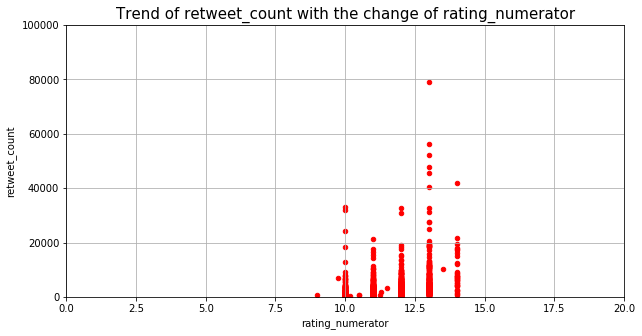

In [62]:
ax = clean_data.plot.scatter(x='rating_numerator',y='retweet_count', grid=True, xlim=(0,20), ylim=(0,100000), color='Red', figsize=(10,5))
ax.set_title('Trend of retweet_count with the change of rating_numerator', fontsize=15)

Text(0.5,1,'Trend of favorite_count with the change of rating_numerator')

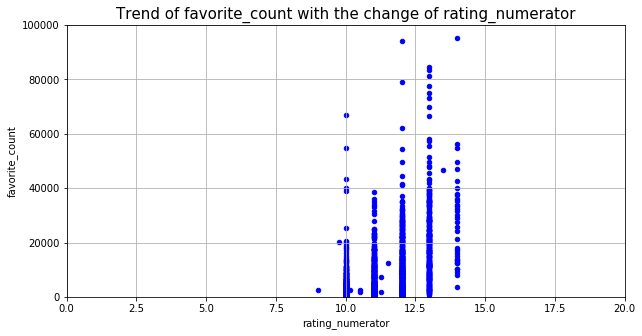

In [63]:
ax = clean_data.plot.scatter(x='rating_numerator',y='favorite_count', grid=True, xlim=(0,20), ylim=(0,100000), color='Blue', figsize=(10,5))
ax.set_title('Trend of favorite_count with the change of rating_numerator', fontsize=15)

## 2. twitter用户WeRateDogs的在线活跃时间段分析

### *Conclusion*：
- 推特用户WeRateDogs通常最活跃时间在一天内的凌晨时间段（0点 - 1点）
- 推特用户WeRateDogs在一年内打分最多的时间段为年底时间段（11 - 12月份）
- 从2015年到2017年，该用户WeRateDogs的评分活动逐渐减少，热度下降

Text(0.5,1,'Active time distribution of hours')

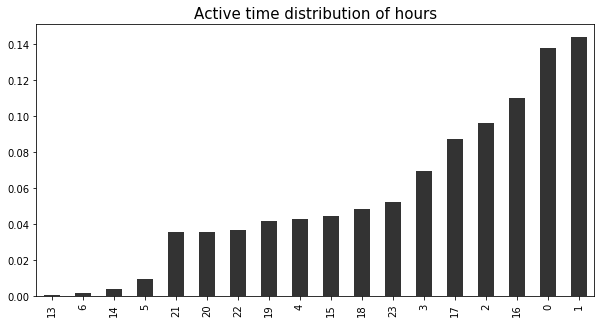

In [64]:
ax = clean_data.timestamp.dt.hour.value_counts(normalize=True, ascending=True).plot.bar(color='black', alpha=0.8, figsize=(10,5))
ax.set_title('Active time distribution of hours', fontsize=15)

Text(0.5,1,'Active time distribution of months')

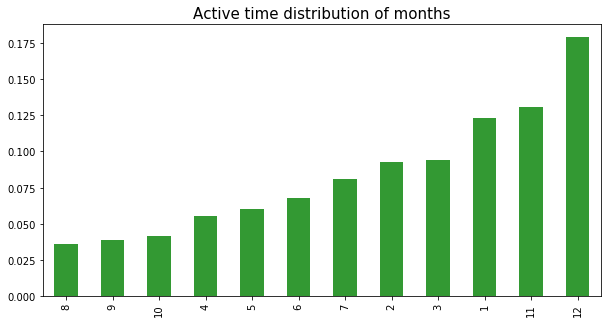

In [65]:
ax = clean_data.timestamp.dt.month.value_counts(normalize=True, ascending=True).plot.bar(color='green', alpha=0.8, figsize=(10,5))
ax.set_title('Active time distribution of months', fontsize=15)

Text(0.5,1,'Active time distribution of years')

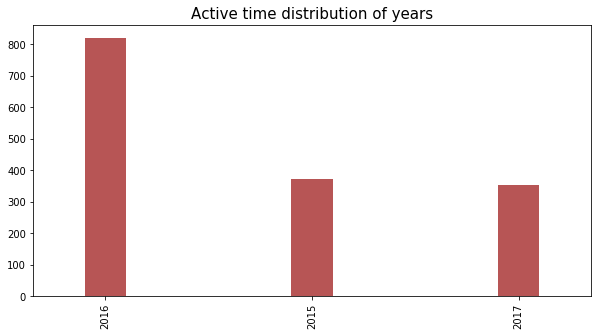

In [66]:
ax = clean_data.timestamp.dt.year.value_counts().plot.bar(color='brown', width=0.2, alpha=0.8, figsize=(10,5))
ax.set_title('Active time distribution of years', fontsize=15)

## 3. 最受欢迎的狗狗名字排行前10

### *Conclusion*：
- 在该数据集中，有名字的狗狗大约占70%
- 在有名字的狗狗中，Charlie，Lucy, Oliver, Cooper, Tucker, Penny, Winston, Daisy, Koda都是比较受欢迎的名字

In [67]:
dog_names = clean_data.name.value_counts()

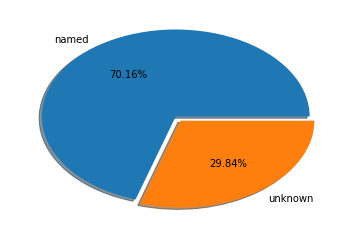

In [68]:
name_distribution = [ sum(dog_names), len(clean_data)-sum(dog_names)]
ax = plt.pie(name_distribution,labels=['named', 'unknown'], autopct='%1.2f%%', explode=(0.03, 0.03),shadow=True, radius=1)

Text(0.5,1,"Ranking of the most popular dog's name")

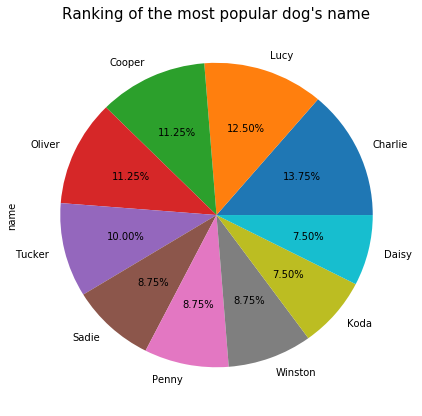

In [69]:
ax = dog_names[0:10].plot.pie(sort_columns=True, figsize=(7,7), autopct='%1.2f%%')
ax.set_title("Ranking of the most popular dog's name", fontsize=15)

In [70]:
dog_names[0:10]

Charlie    11
Lucy       10
Cooper      9
Oliver      9
Tucker      8
Sadie       7
Penny       7
Winston     7
Koda        6
Daisy       6
Name: name, dtype: int64